In [1]:
import pandas as pd
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [2]:
df_race_mental_illness = df.pivot_table(values='name', index=['race', 'signs_of_mental_illness'] , aggfunc=[len])
df_race_mental_illness

len
                              name
race signs_of_mental_illness      
A    False                      69
     True                       24
B    False                    1114
     True                      184
H    False                     745
     True                      157
N    False                      64
     True                       14
O    False                      37
     True                       11
W    False                    1763
     True                      713

W powyższe tabeli widać dla jakiego typu rasy popełnione najwięcej zabójstw z rozbiciem na przypadki dotyczące osób z chorobą psychoczną(oznacznie - True)

In [3]:
df_race_mental_illness = df_race_mental_illness.reset_index()

In [4]:
df_race_mental_illness

,race,signs_of_mental_illness,len
,,,name
0,A,False,69
1,A,True,24
2,B,False,1114
3,B,True,184
4,H,False,745
5,H,True,157
6,N,False,64
7,N,True,14
8,O,False,37


In [6]:
import numpy as np
df_race_mental_illness['order'] = np.arange(12)

In [7]:
df_race_mental_illness

,race,signs_of_mental_illness,len,order
,,,name,
0,A,False,69,0
1,A,True,24,1
2,B,False,1114,2
3,B,True,184,3
4,H,False,745,4
5,H,True,157,5
6,N,False,64,6
7,N,True,14,7
8,O,False,37,8


In [8]:
def percentage_crime_race(row, y=2):
    
    a = row['signs_of_mental_illness']
    b = row['len']
    c = row['order']
        
    if a.any() == True:
            return round(b.item()/(df_race_mental_illness.iloc[c.item()-1 ,y] + b.item())*100, 2)
        
    if a.any() == False:
            return 0

In [9]:
df_race_mental_illness['%_crime'] = df_race_mental_illness.apply(lambda row: percentage_crime_race(row),axis=1)
df_race_mental_illness

,race,signs_of_mental_illness,len,order,%_crime
,,,name,,
0,A,False,69,0,0.00
1,A,True,24,1,25.81
2,B,False,1114,2,0.00
3,B,True,184,3,14.18
4,H,False,745,4,0.00
5,H,True,157,5,17.41
6,N,False,64,6,0.00
7,N,True,14,7,17.95
8,O,False,37,8,0.00


Rasą charakteryzującą się największym odesetkiem znamion choroby psychicznej podczas interwencji jest rasa "W".

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [11]:
dates_table = df.pivot_table(values='name', index=['day_name'] , aggfunc=(len))
dates_table

,name
day_name,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [12]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_dict = dict(zip(week,range(len(week))))
week_dict

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [13]:
dates_table['day_number'] = dates_table.index
dates_table['day_number'] = dates_table['day_number'].map(week_dict)
dates_table

,name,day_number
day_name,,
Friday,761,4
Monday,726,0
Saturday,721,5
Sunday,753,6
Thursday,810,3
Tuesday,816,1
Wednesday,829,2


In [14]:
dates_table.sort_values('day_number', inplace=True)
dates_table

,name,day_number
day_name,,
Monday,726,0
Tuesday,816,1
Wednesday,829,2
Thursday,810,3
Friday,761,4
Saturday,721,5
Sunday,753,6


<BarContainer object of 7 artists>

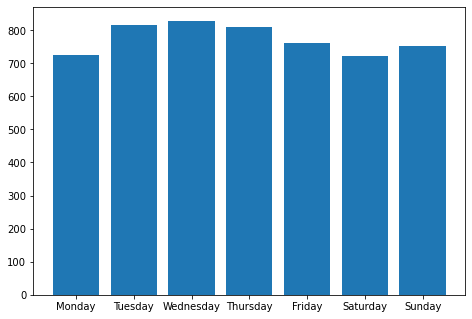

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
x = dates_table.index
y = dates_table['name']
axes.bar(x,y)

In [16]:
data_1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
data_2 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [17]:
df_1 = data_1[0]
df_1

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [19]:
df_2 = data_2[0]
df_2

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%


In [21]:
df_1.columns = range(df_1.columns.size)
df_1.head(20)

,0,1,2,3,4,5,6,7,8,9
0,Codes:,Codes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO,"ISO 3166 codes (2-letter, 3-letter, and 3-digi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANSI,2-letter and 2-digit codes from the ANSI stand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USPS,2-letter codes used by the United States Posta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USCG,2-letter codes used by the United States Coast...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Abbreviations:,Abbreviations:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GPO,Older variable-length official US Government P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AP,Abbreviations from the AP Stylebook (bold red ...,Abbreviations from the AP Stylebook (bold red ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Name and status of region,Name and status of region,ISO,ANSI,ANSI,USPS,USCG,GPO,AP,Otherabbreviations
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPO,AP,Otherabbreviations


In [22]:
df_1_states = df_1[(df_1[1] == 'State') | (df_1[1] == 'Federal district')]
df_1_states

,0,1,2,3,4,5,6,7,8,9
11,Alabama,State,US-AL,AL,01,AL,AL,Ala.,Ala.,NaN
12,Alaska,State,US-AK,AK,02,AK,AK,Alaska,Alaska,Ak.[1]
13,Arizona,State,US-AZ,AZ,04,AZ,AZ,Ariz.,Ariz.,NaN
14,Arkansas,State,US-AR,AR,05,AR,AR,Ark.,Ark.,NaN
15,California,State,US-CA,CA,06,CA,CF,Calif.,Calif.,Cal.
16,Colorado,State,US-CO,CO,08,CO,CL,Colo.,Colo.,NaN
17,Connecticut,State,US-CT,CT,09,CT,CT,Conn.,Conn.,NaN
18,Delaware,State,US-DE,DE,10,DE,DL,Del.,Del.,NaN
19,District of Columbia,Federal district,US-DC,DC,11,DC,DC,D.C.,D.C.,Dis. Col.[2]
20,Florida,State,US-FL,FL,12,FL,FL,Fla.,Fla.,NaN


In [23]:
array_names = df_1_states[0].to_numpy()
array_abbr = df_1_states[3].to_numpy()

In [24]:
array_names

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [25]:
array_abbr

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [27]:
states_dict = dict(zip(array_abbr, array_names))
df['state_name'] = df['state'].map(states_dict)
df.head(20)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_name,state_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,Colorado
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,Sunday,Oklahoma
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,Monday,Arizona
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,Tuesday,Kansas
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,Tuesday,Iowa
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,Tuesday,Pennsylvania


In [28]:
df_state_stat = df.pivot_table(values='name', index=['state_name'] , aggfunc=(len))
df_state_stat

,name
state_name,
Alabama,104
Alaska,39
Arizona,254
Arkansas,83
California,799
Colorado,195
Connecticut,21
Delaware,13
District of Columbia,13


In [29]:
df_state_stat.rename(columns={'name': 'crime_numbers'}, inplace=True)
df_join = df_2.join(df_state_stat,on='State',how='inner')
df_join

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]",crime_numbers
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%,799
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%,481
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%,350
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%,101
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%,108
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%,104
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%,155
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%,182
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%,156
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%,78


In [30]:
def population_crime(row):
    x = row['Population estimate, July 1, 2019[2]']
    y = row['crime_numbers']
    return (1000*y)/x

In [31]:
df_join['crimes per 1000 inhabitants'] = round(df_join.apply(lambda row: population_crime(row),axis=1),3)
df_join

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]",crime_numbers,crimes per 1000 inhabitants
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%,799,0.020
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%,481,0.017
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%,350,0.016
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%,101,0.005
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%,108,0.008
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%,104,0.008
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%,155,0.013
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%,182,0.017
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%,156,0.015
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%,78,0.008
